# Cardiovascular Prediction and Analysis

### 1. Data Set Loading

In [1]:
# import libraries
import pandas as pd
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore any warning messages
warnings.filterwarnings('ignore')

# Read the CSV file
df = pd.read_csv('cardio_train.csv')

In [3]:
# Display the number of rows and columns in the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 70000 rows and 13 columns


In [4]:
# Display the first 5 rows of data
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [5]:
# Display the count of non-null records for each column
print("Count of non-null records for each column:")
print(df.count())

Count of non-null records for each column:
id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64


## 2. Data Cleaning

In [6]:
# Filter records where "cardio" field is null
df = df.dropna(subset=['cardio'])

# Filter records where "age" field is null
df = df.dropna(subset=['age'])

# Filter records where "cholesterol" field is null
df = df.dropna(subset=['cholesterol'])

# Filter records where "weight" field is null
df = df.dropna(subset=['weight'])

# Filter records where "ap_lo" field is less than 10
df = df[df['ap_lo'] >= 10]

# Filter records where "ap_hi" field is less than 10
df = df[df['ap_hi'] >= 10]

In [7]:
# Display the count of non-null records for each column
print("Count of non-null records for each column:")
print(df.count())

Count of non-null records for each column:
id             69960
age            69960
gender         69960
height         69960
weight         69960
ap_hi          69960
ap_lo          69960
cholesterol    69960
gluc           69960
smoke          69960
alco           69960
active         69960
cardio         69960
dtype: int64


In [8]:
# Convert the "age" column to years
df['age'] = round(df['age'] / 365)

# Round the "weight" field to the nearest integer
df['weight'] = df['weight'].astype(int)


In [9]:
# Display the first 5 rows of data
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168      62    110     80            1     1      0   
1   1  55.0       1     156      85    140     90            3     1      0   
2   2  52.0       1     165      64    130     70            3     1      0   
3   3  48.0       2     169      82    150    100            1     1      0   
4   4  48.0       1     156      56    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


## 3. Data Exploration (All charts should display numeric values)






## 3.1 Relationship between age and disease

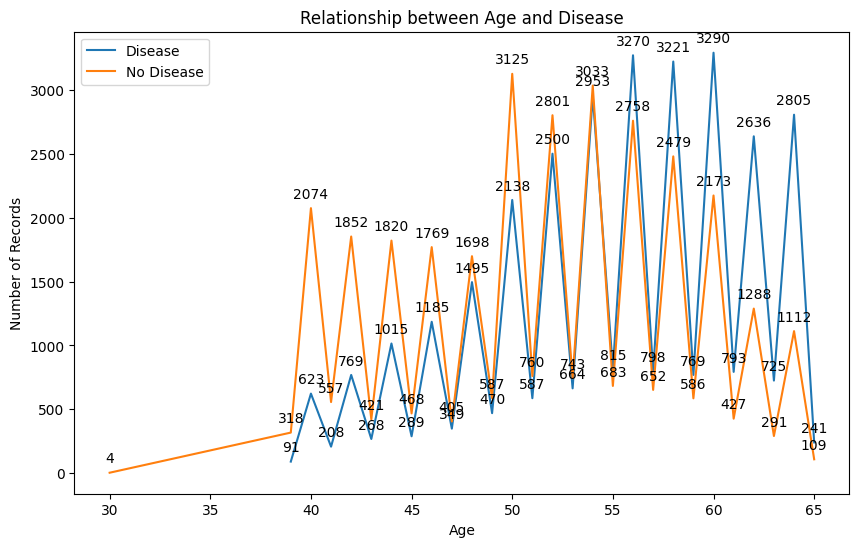

In [10]:
# Filter records where cardio=1 (disease)
df_disease = df[df['cardio'] == 1]

# Group by age and count the number of disease cases
age_disease_counts = df_disease.groupby('age')['cardio'].count()

# Group by age and count the number of non-disease cases
age_no_disease_counts = df[df['cardio'] == 0].groupby('age')['cardio'].count()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_disease_counts.index, y=age_disease_counts.values, label='Disease')
sns.lineplot(x=age_no_disease_counts.index, y=age_no_disease_counts.values, label='No Disease')

plt.title('Relationship between Age and Disease')
plt.xlabel('Age')
plt.ylabel('Number of Records')

plt.legend()
for x, y in zip(age_disease_counts.index, age_disease_counts.values):
    plt.annotate(f'{y}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')

for x, y in zip(age_no_disease_counts.index, age_no_disease_counts.values):
    plt.annotate(f'{y}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

plt.show()

Conclusion: As age increases, the probability of being afflicted with illness also increases. 

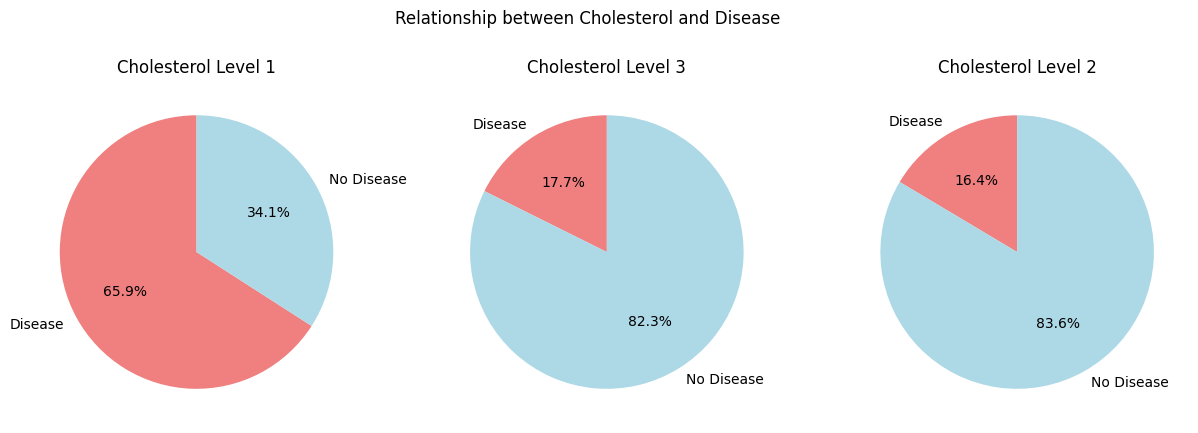

In [11]:
# Group by cholesterol and count the number of disease cases
cholesterol_counts = df_disease['cholesterol'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# For each cholesterol level, plot a sub-pie chart
for i, cholesterol_level in enumerate(cholesterol_counts.index, 1):
    subset_df = df_disease[df_disease['cholesterol'] == cholesterol_level]
    subset_counts = subset_df['cholesterol'].count()
    
    # Plot the sub-pie chart
    axes[i - 1].pie([subset_counts, df_disease['cholesterol'].count() - subset_counts],
                   labels=['Disease', 'No Disease'],
                   autopct='%1.1f%%',
                   startangle=90,
                   colors=['lightcoral', 'lightblue'])
    
    axes[i - 1].set_title(f'Cholesterol Level {cholesterol_level}')

plt.suptitle('Relationship between Cholesterol and Disease')

plt.show()


Conclusion:  The more severe the cholesterol levels, the higher the probability of illness.

##  3.2 Relationship between cholesterol and disease

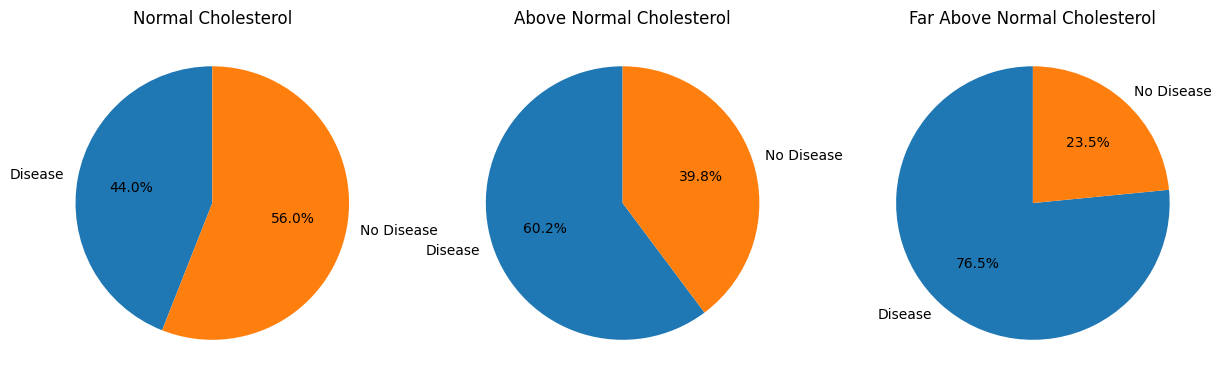

In [12]:
# Create three subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot 1: Normal Cholesterol
df_chol_1 = df[df['cholesterol'] == 1]
df_chol_1_disease = df_chol_1[df_chol_1['cardio'] == 1]
sizes_1 = [len(df_chol_1_disease), len(df_chol_1) - len(df_chol_1_disease)]
labels_1 = ['Disease', 'No Disease']
axes[0].pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Normal Cholesterol')

# Subplot 2: Above Normal Cholesterol
df_chol_2 = df[df['cholesterol'] == 2]
df_chol_2_disease = df_chol_2[df_chol_2['cardio'] == 1]
sizes_2 = [len(df_chol_2_disease), len(df_chol_2) - len(df_chol_2_disease)]
labels_2 = ['Disease', 'No Disease']
axes[1].pie(sizes_2, labels=labels_2, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Above Normal Cholesterol')

# Subplot 3: Far Above Normal Cholesterol
df_chol_3 = df[df['cholesterol'] == 3]
df_chol_3_disease = df_chol_3[df_chol_3['cardio'] == 1]
sizes_3 = [len(df_chol_3_disease), len(df_chol_3) - len(df_chol_3_disease)]
labels_3 = ['Disease', 'No Disease']
axes[2].pie(sizes_3, labels=labels_3, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Far Above Normal Cholesterol')

# Display the plots
plt.show()

Conclusion:  From the above figure, it can be seen that as the level of cholesterol increases, the probability of developing heart disease significantly rises.

## 3.3 Relationship between weight and disease

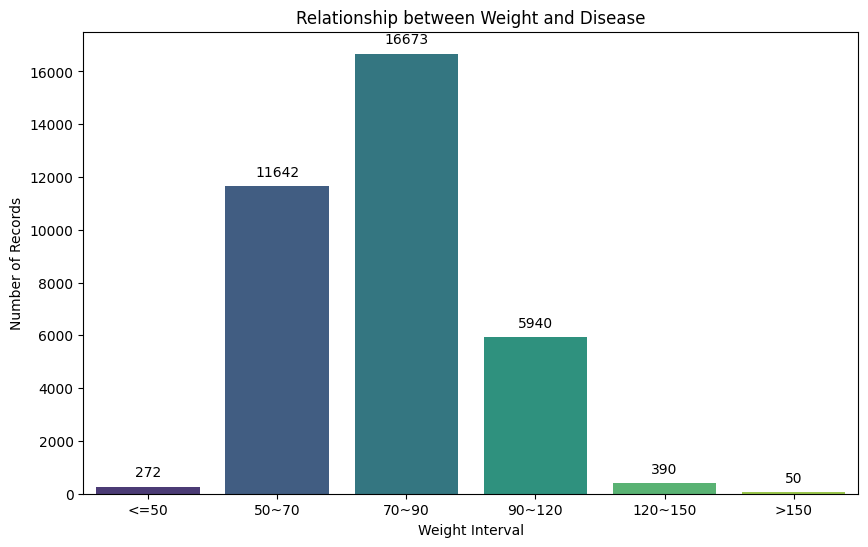

In [13]:
# Divide weight into specified intervals
weight_bins = [0, 50, 70, 90, 120, 150, float('inf')]
weight_labels = ['<=50', '50~70', '70~90', '90~120', '120~150', '>150']
df_disease['weight_interval'] = pd.cut(df_disease['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Count the number of disease cases in each interval
weight_interval_counts = df_disease['weight_interval'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weight_interval_counts.index, y=weight_interval_counts.values, palette="viridis")

# Set the title and labels for the plot
plt.title('Relationship between Weight and Disease')
plt.xlabel('Weight Interval')
plt.ylabel('Number of Records')

for x, y in zip(weight_interval_counts.index, weight_interval_counts.values):
    plt.annotate(f'{y}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')
# Show the plot
plt.show()


Conclusion: 
The number of individuals with the illness follows a normal distribution within the range of body weight.

## 3.4 Relationship between glucose and disease

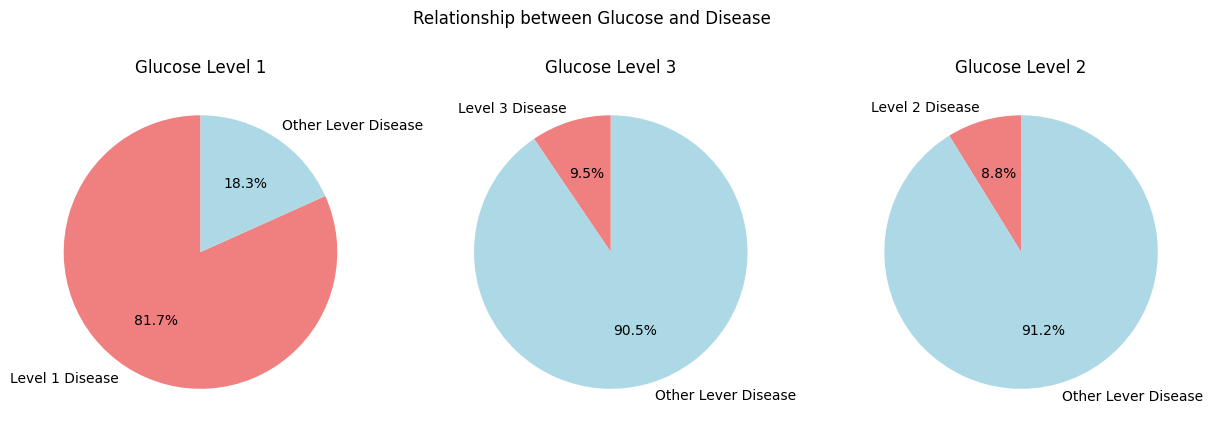

In [14]:
# Filter records where cardio=1 (disease)
df_disease = df[df['cardio'] == 1]
# Group by glucose and count the number of disease cases
glucose_counts = df_disease['gluc'].value_counts()

# Create a figure with sub-pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# For each glucose level, plot a sub-pie chart
for i, glucose_level in enumerate(glucose_counts.index, 1):
    subset_df = df_disease[df_disease['gluc'] == glucose_level]
    subset_counts = subset_df['gluc'].count()
    
    # Plot the sub-pie chart
    axes[i - 1].pie([subset_counts, df_disease['gluc'].count() - subset_counts],
                   labels=[f'Level {glucose_level} Disease', 'Other Lever Disease'],
                   autopct='%1.1f%%',
                   startangle=90,
                   colors=['lightcoral', 'lightblue'])
    
    # Set the title for each sub-pie chart
    axes[i - 1].set_title(f'Glucose Level {glucose_level}')

# Set the main title for the entire plot
plt.suptitle('Relationship between Glucose and Disease')

# Show the plot
plt.show()

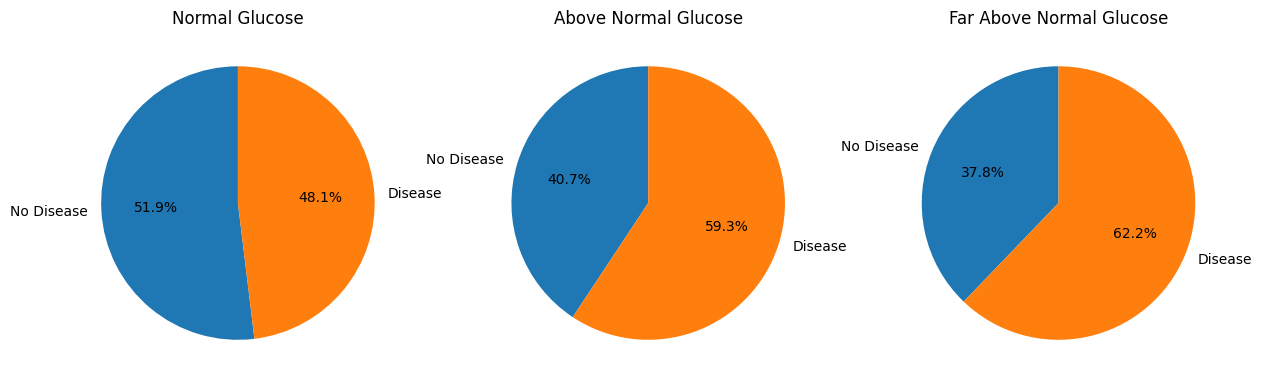

In [15]:
# Create three subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot 1: Normal Glucose
df_gluc_1 = df[df['gluc'] == 1]
df_gluc_1_disease = df_gluc_1[df_gluc_1['cardio'] == 1]
sizes_1 = [len(df_gluc_1) - len(df_gluc_1_disease), len(df_gluc_1_disease)]
labels_1 = ['No Disease', 'Disease']
axes[0].pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Normal Glucose')

# Subplot 2: Above Normal Glucose
df_gluc_2 = df[df['gluc'] == 2]
df_gluc_2_disease = df_gluc_2[df_gluc_2['cardio'] == 1]
sizes_2 = [len(df_gluc_2) - len(df_gluc_2_disease), len(df_gluc_2_disease)]
labels_2 = ['No Disease', 'Disease']
axes[1].pie(sizes_2, labels=labels_2, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Above Normal Glucose')

# Subplot 3: Far Above Normal Glucose
df_gluc_3 = df[df['gluc'] == 3]
df_gluc_3_disease = df_gluc_3[df_gluc_3['cardio'] == 1]
sizes_3 = [len(df_gluc_3) - len(df_gluc_3_disease), len(df_gluc_3_disease)]
labels_3 = ['No Disease', 'Disease']
axes[2].pie(sizes_3, labels=labels_3, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Far Above Normal Glucose')

# Display the plots
plt.show()

From normal glucose levels to above normal glucose levels, and further to far above normal glucose levels, the incidence of illness significantly rises.


In [16]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72,135,80,1,2,0,0,0,1


## 3.5 Relationship between diastolic pressure and disease

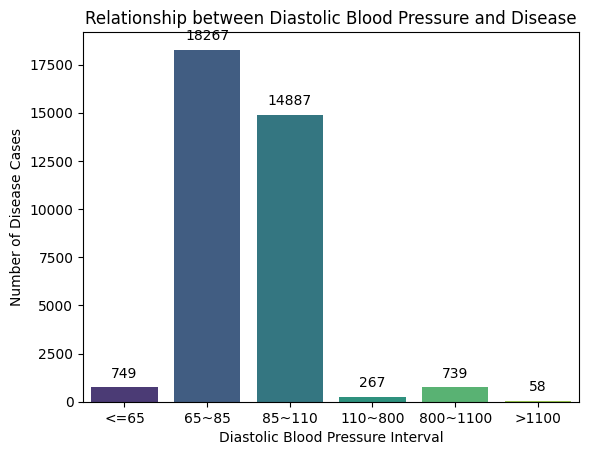

In [17]:
# Define diastolic blood pressure intervals
bins = [0, 65, 85, 110, 800, 1100, float('inf')]
labels = ['<=65', '65~85', '85~110', '110~800', '800~1100', '>1100']

# Categorize data and count disease cases within each interval
df['ap_lo_interval'] = pd.cut(df['ap_lo'], bins=bins, labels=labels)
df_disease_by_ap_lo = df[df['cardio'] == 1].groupby('ap_lo_interval')['cardio'].count()

# Create a bar chart
sns.barplot(x=df_disease_by_ap_lo.index, y=df_disease_by_ap_lo, palette="viridis")
plt.xlabel('Diastolic Blood Pressure Interval')
plt.ylabel('Number of Disease Cases')
plt.title('Relationship between Diastolic Blood Pressure and Disease')

for x, y in zip(df_disease_by_ap_lo.index, df_disease_by_ap_lo):
    plt.annotate(f'{y}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display the plot
plt.show()

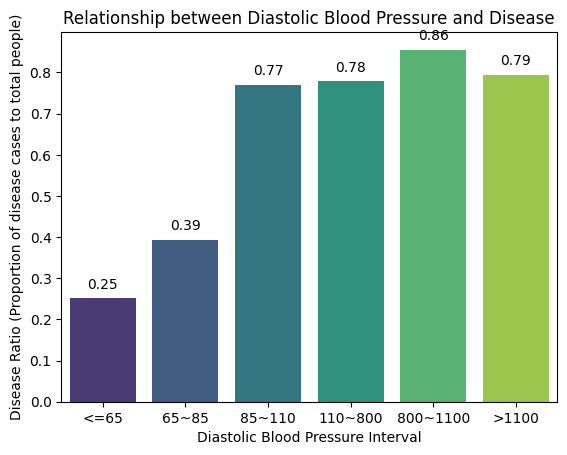

In [18]:

# Define diastolic blood pressure intervals
bins = [0, 65, 85, 110, 800, 1100, float('inf')]
labels = ['<=65', '65~85', '85~110', '110~800', '800~1100', '>1100']
# Categorize data and calculate the ratio of disease cases to total people within each interval
df['ap_lo_interval'] = pd.cut(df['ap_lo'], bins=bins, labels=labels)
df_disease_by_ap_lo = df[df['cardio'] == 1].groupby('ap_lo_interval')['cardio'].count()
df_total_by_ap_lo = df.groupby('ap_lo_interval')['cardio'].count()
df_ratio_by_ap_lo = df_disease_by_ap_lo / df_total_by_ap_lo

# Create a bar chart for the disease ratio
# plt.bar(df_ratio_by_ap_lo.index, df_ratio_by_ap_lo)
sns.barplot(x=df_ratio_by_ap_lo.index, y=df_ratio_by_ap_lo, palette="viridis")
plt.xlabel('Diastolic Blood Pressure Interval')
plt.ylabel('Disease Ratio (Proportion of disease cases to total people)')
plt.title('Relationship between Diastolic Blood Pressure and Disease')

for x, y in zip(df_disease_by_ap_lo.index, df_ratio_by_ap_lo):
    plt.annotate(f'{y:.2f}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')
# Display the plot
plt.show()



Conclusion: With the increase in blood pressure, the likelihood of being afflicted with illness also rises.

## 3.6 Relationship between systolic pressure and disease

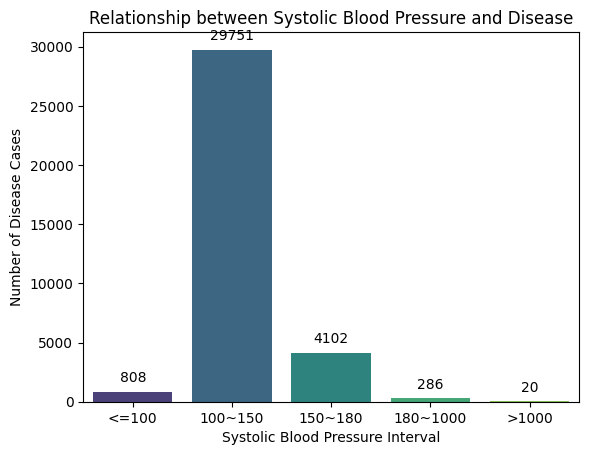

In [19]:
# Define systolic blood pressure intervals
bins = [0, 100, 150, 180, 1000, float('inf')]
labels = ['<=100', '100~150', '150~180', '180~1000', '>1000']

# Categorize data and count disease cases within each interval
df['ap_hi_interval'] = pd.cut(df['ap_hi'], bins=bins, labels=labels)
df_disease_by_ap_hi = df[df['cardio'] == 1].groupby('ap_hi_interval')['cardio'].count().reset_index(name='disease_count')

# Create a bar plot using sns.barplot
sns.barplot(x='ap_hi_interval', y='disease_count', data=df_disease_by_ap_hi, palette='viridis')
plt.xlabel('Systolic Blood Pressure Interval')
plt.ylabel('Number of Disease Cases')
plt.title('Relationship between Systolic Blood Pressure and Disease')

for x, y in zip(df_disease_by_ap_hi['ap_hi_interval'], df_disease_by_ap_hi['disease_count']):
    plt.annotate(f'{y}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')
# Display the plot
plt.show()


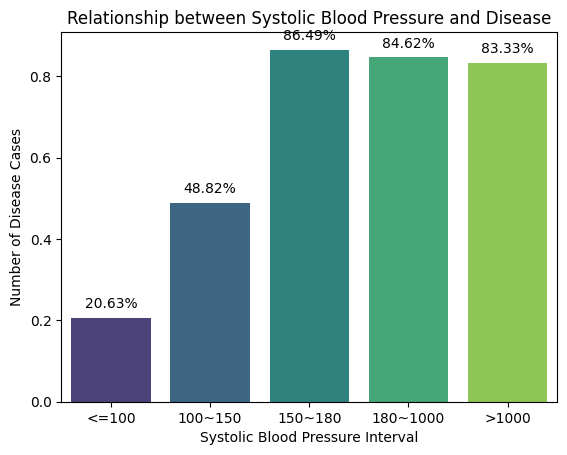

In [20]:
# Define systolic blood pressure intervals
bins_ap_hi = [0, 100, 150, 180, 1000, float('inf')]
labels_ap_hi = ['<=100', '100~150', '150~180', '180~1000', '>1000']

# Categorize data and calculate the ratio of disease cases to total people within each interval
df['ap_hi_interval'] = pd.cut(df['ap_hi'], bins=bins_ap_hi, labels=labels_ap_hi)
df_disease_by_ap_hi = df[df['cardio'] == 1].groupby('ap_hi_interval')['cardio'].count()
df_total_by_ap_hi = df.groupby('ap_hi_interval')['cardio'].count()
df_ratio_by_ap_hi = df_disease_by_ap_hi / df_total_by_ap_hi

# Create a bar chart for the disease ratio
# plt.bar(df_ratio_by_ap_hi.index, df_ratio_by_ap_hi)
sns.barplot(x=df_ratio_by_ap_hi.index, y=df_ratio_by_ap_hi, palette="viridis")
plt.xlabel('Systolic Blood Pressure Interval')
plt.ylabel('Number of Disease Cases')
plt.title('Relationship between Systolic Blood Pressure and Disease')
for x, y in zip(df_ratio_by_ap_hi.index, df_ratio_by_ap_hi):
    plt.annotate(f'{y:.2%}',
                 xy=(x, y),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display the plot
plt.show()

Conclusion: With the increase in Systolic Blood Pressure, the likelihood of being afflicted with illness also rises.

## 3.7 Relationship between gender and disease

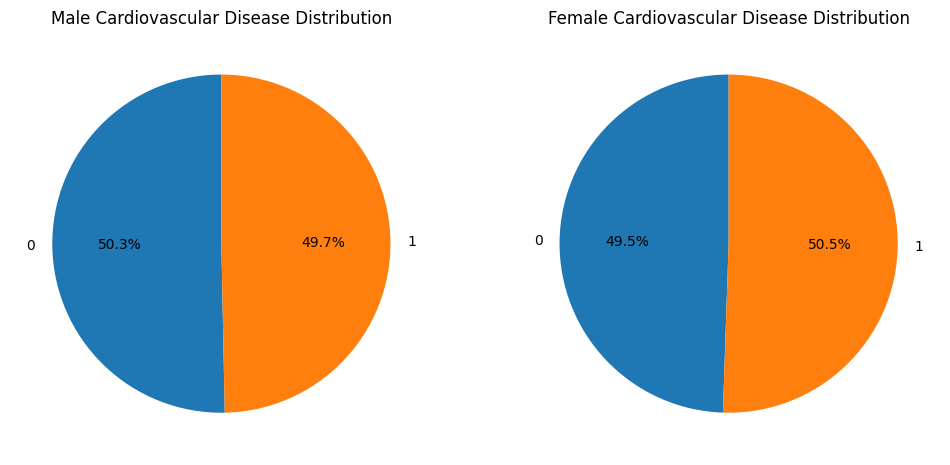

In [21]:
# Analyze the relationship between gender and disease
gender_count = df['gender'].value_counts()
disease_count = df.groupby('gender')['cardio'].value_counts(normalize=True).unstack()

# Plot sub-pie charts
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Male cardiovascular disease distribution
axes[0].pie(disease_count.loc[1], labels=disease_count.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Male Cardiovascular Disease Distribution')

# Female cardiovascular disease distribution
axes[1].pie(disease_count.loc[2], labels=disease_count.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Female Cardiovascular Disease Distribution')

plt.show()


Conclusion: Gender has little to no significant correlation with the incidence of illness.

# 4. Cardiovascular Prediction Using Machine Learning

In [22]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cardio_train.csv')

# Filter out records with missing values
df = df.dropna(subset=['cardio', 'age', 'cholesterol', 'weight'])
df = df[df['ap_lo'] >= 10]
df = df[df['ap_hi'] >= 10]

Feature selection through selecting feature vectors, correlation analysis, and heatmap

Correlation Matrix:
                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003405  0.003581 -0.003271 -0.001797  0.003272   
age          0.003405  1.000000 -0.022909 -0.082054  0.053588  0.020912   
gender       0.003581 -0.022909  1.000000  0.499806  0.155561  0.006105   
height      -0.003271 -0.082054  0.499806  1.000000  0.291166  0.005478   
weight      -0.001797  0.053588  0.155561  0.291166  1.000000  0.031047   
ap_hi        0.003272  0.020912  0.006105  0.005478  0.031047  1.000000   
ap_lo       -0.002354  0.017836  0.015162  0.006043  0.043777  0.016495   
cholesterol  0.006185  0.154528 -0.035754 -0.050370  0.141669  0.023880   
gluc         0.002366  0.098638 -0.020520 -0.018766  0.106738  0.011939   
smoke       -0.003666 -0.047717  0.338159  0.188101  0.067814 -0.000826   
alco         0.001217 -0.029858  0.170988  0.094374  0.067102  0.001454   
active       0.003779 -0.009956  0.005904 -0.006648 -0.016928 -0.000251   
cardi

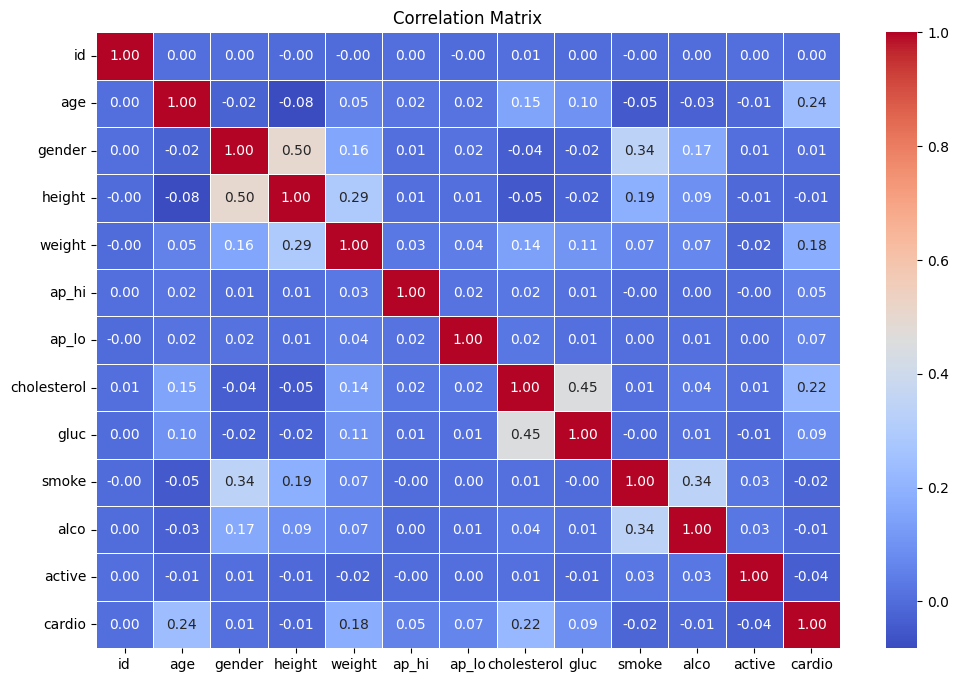

In [23]:
# Perform correlation analysis
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


From the correlation analysis and the heatmap matrix above, we can easily discern the following significant associations:

### Age:

The positive correlation coefficient of 0.238132 indicates a strong positive relationship between age and cardiovascular disease. As age increases, the likelihood of developing cardiovascular disease also increases.

### Cholesterol:
With a positive correlation coefficient of 0.221093, it suggests an association between cholesterol levels and cardiovascular disease. Higher cholesterol levels may be correlated with an elevated risk of cardiovascular disease.

### Weight:
The positive correlation coefficient of 0.181491 indicates a certain positive relationship between weight and cardiovascular disease. Individuals with higher weights may be more prone to developing cardiovascular disease.

While these correlations highlight notable associations, it's important to note that other correlations in the matrix are relatively weaker. Further investigation and analysis may be needed to comprehensively understand the complex interplay of factors influencing cardiovascular health in the dataset.







In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

Evaluate using accuracy and F1 score for the "cardio" fiel

In [25]:
# Calculate correlation with the target variable
correlation_with_target = df.corr()['cardio'].abs()

# Select features with correlation higher than 0.05
selected_features = correlation_with_target[correlation_with_target > 0.05].index

# Features (X) and target variable (y)
X = df[selected_features].drop(['cardio'], axis=1)
y = df['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_before = X_test
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Model Evaluation
models = [logistic_model, random_forest_model, svm_model]
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']

accuracy_scores = []
f1_scores = []

for model, name in zip(models, model_names):
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Additional metrics
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("---------------------\n")

=== Logistic Regression ===
Accuracy: 0.7218
F1 Score: 0.7081
Confusion Matrix:
[[5380 1634]
 [2258 4720]]
---------------------

=== Random Forest ===
Accuracy: 0.6850
F1 Score: 0.6865
Confusion Matrix:
[[4757 2257]
 [2151 4827]]
---------------------

=== Support Vector Machine ===
Accuracy: 0.7299
F1 Score: 0.7218
Confusion Matrix:
[[5310 1704]
 [2075 4903]]
---------------------



In [28]:
# Combine selected features with actual and predicted values
result_df = pd.DataFrame(X_test_before)
result_df['Actual'] = y_test
result_df['Logistic_Prediction'] = logistic_predictions
result_df['RandomForest_Prediction'] = rf_predictions
result_df['SVM_Prediction'] = svm_predictions

# Display the first 5 rows
print(result_df.head())

         age  weight  ap_hi  ap_lo  cholesterol  gluc  Actual  \
7332   17570    59.0    120     80            1     1       0   
14232  22314    82.0    130     80            1     1       1   
33815  22870    80.0    120     80            3     3       1   
45228  17631    62.0    120     80            1     1       0   
47458  18347    51.0    110     70            1     1       0   

       Logistic_Prediction  RandomForest_Prediction  SVM_Prediction  
7332                     0                        0               0  
14232                    1                        0               1  
33815                    1                        1               1  
45228                    0                        0               0  
47458                    0                        0               0  


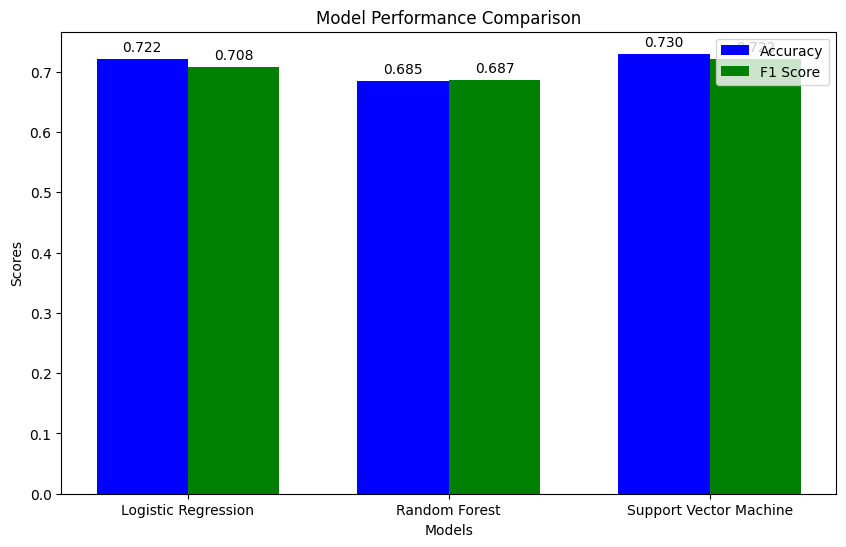

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

From the above results, it can be observed that using the selected few features achieves a comparable performance to using all features, and there is minimal difference in the performance of the three methods. However, Support Vector Machine (SVM) stands out as the best-performing among them.